In [ ]:
import pandas as pd
import seaborn as sns
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [2]:
MLP_data = pd.read_csv("C:\\Users\\Gökhan\\Desktop\\Gökhan\\nids-adversarial\\data\\without_Attack_cat_clear_data_full.csv", low_memory=False)

X_train = pd.read_csv("C:\\Users\\Gökhan\\Desktop\\Gökhan\\nids-adversarial\\data\\X_train.csv", low_memory=False)
y_train = pd.read_csv("C:\\Users\\Gökhan\\Desktop\\Gökhan\\nids-adversarial\\data\\y_train.csv", low_memory=False)

X_test = pd.read_csv("C:\\Users\\Gökhan\\Desktop\\Gökhan\\nids-adversarial\\data\\X_test.csv", low_memory=False)
y_test = pd.read_csv("C:\\Users\\Gökhan\\Desktop\\Gökhan\\nids-adversarial\\data\\y_test.csv", low_memory=False)

In [3]:
mlp_params = dict(
    hidden_layer_sizes=(128, 64),  # 2 hidden layer: 128 ve 64 neuron
    activation='relu',
    solver='adam',
    alpha=1e-4,                    # L2 regularization
    learning_rate_init=1e-3,
    max_iter=50,                   # ilk denemede düşük tut, gerekirse artırırsın
    random_state=42
)

mlp_model = Pipeline([
    ("scaler", StandardScaler()),          # feature'ları ölçekle
    ("mlp", MLPClassifier(**mlp_params)),  # MLP modeli
])

In [4]:
mlp_model.fit(X_train, y_train)
y_pred = mlp_model.predict(X_test)

c:\Users\Gökhan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1218: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Gökhan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:787: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


              precision    recall  f1-score   support

           0     0.9954    0.9960    0.9957    443749
           1     0.9724    0.9684    0.9704     64257

    accuracy                         0.9925    508006
   macro avg     0.9839    0.9822    0.9831    508006
weighted avg     0.9925    0.9925    0.9925    508006



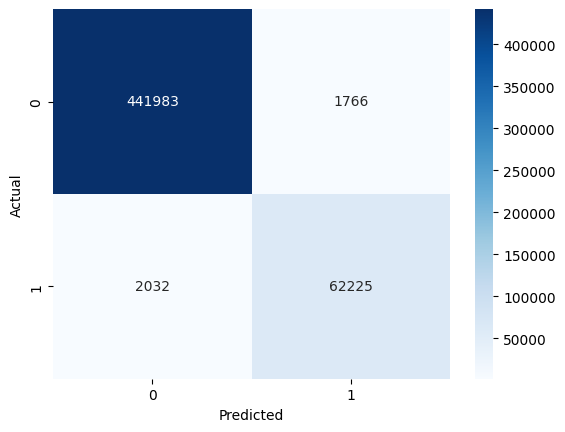

In [5]:
print(classification_report(y_test, y_pred, digits=4))
cm = confusion_matrix(y_test, y_pred)
...
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

MLP outputu ile RF outputu farkını al min yap

distilled Model oku ve izle